# **Project - Solar Flares**

## Author: *Pramod Kumar*

###### Python Version: 3.12.3

---

### Dataframes Used

- **`df_r`**:  
  DataFrame created from [Top 50 Solar Flares](https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares), representing the top 50 solar flares.

- **`df`**:  
  DataFrame created from the [NASA Solar Flare Table](http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html), containing a comprehensive list of solar flares.

- **`final_result`**:  
  DataFrame derived from `df` representing the top 50 data entries from the NASA table.

---



#### Libraries

In [1]:
#   BeautifulSoup is used for parsing and extracting data from HTML and XML files.
from bs4 import BeautifulSoup

#   curl_cffi is a library that provides a Python interface for making HTTP requests. 
#   It mimics curl, a tool for transferring data via URLs, and allows you to make web requests with impersonation.
from curl_cffi import requests

#   Pandas is used for working with dataframes; used for processing, analyzing tabular data
import pandas as pd

#   Numpy is used for numerical operations and computations
import numpy as np

#   re is for REGEX (Regular Expressions) which is used for pattern matching and searching within strings.
import re

#   matplotlib and seaborn are used for creating data visualizations in Python
from matplotlib import pyplot as plt
import seaborn as sns

## Part 1: Data Scraping and Preparation

### Step 1: Scraping competitor's data

The tasks for this step will mostly include 
-   Use `requests` to get (as in, HTTP GET) the URL. 
-   Extract the text from the page
-   Use BeautifulSoup to read and parse the data, either as html or lxml
-   Use prettify( ) to view the content and find the appropriate table
-   Use find( ) to save the aforementioned table as a variable
-   Use pandas to read in the HTML file into a dataframe.  HINT make-sure the above data is properly typecast.
-   Set reasonable names for the table columns, e.g., rank, x_class, date, region, start_time, max_time, end_time, movie

As the 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html' website blocks the requests sent by our python code and returns '403' as status code, we find a way to work around it. From the website 'https://www.whatismybrowser.com/detect/what-is-my-user-agent/', I have found my user agent. So I have used that so that website does not think I am a bot.


In [2]:
#   Using requests with headers to bypass 403 forbidden error. The below is my user agent. So I have used that.

header = {
    'Host': 'www.spaceweatherlive.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36',
    'Accept': '*/*'
}

#   Step 2: Send an HTTP GET request with headers
url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares"
response = requests.get(url, headers= header)

#   Checking if we get 200 as response
response

<Response [200]>

In [3]:
#   Alternate method to get the page from the given URL by making a request impersonating chrome.
r = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares", impersonate="chrome")

#   Print the content as text (HTML)
print(r.status_code)


200


Let us now view the text present in the response which we extracted using 'requests'

In [4]:
response.text

'<!doctype html>\n<html lang="en">\n    <head>\n        <title>Top 50 solar flares | Solar activity | SpaceWeatherLive.com</title>\n        <meta charset="utf-8" />\n        <meta name="robots" content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1">        <meta name="description" content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v...">\n        <meta name="keywords" content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR">\n        <!-- Facebook meta -->\n        <meta property="og:url" content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html">\n        <meta property="o

In [5]:
soup_r = BeautifulSoup(response.text, 'html.parser')
soup_r


<!DOCTYPE html>

<html lang="en">
<head>
<title>Top 50 solar flares | Solar activity | SpaceWeatherLive.com</title>
<meta charset="utf-8"/>
<meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/> <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
<meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>
<!-- Facebook meta -->
<meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html" property="og:url"/>
<meta content="article" property="og:type"/>
<meta content="Top 50 solar flares | Solar ac

The HTML content obtained from the webpage is stores in response. We take the text from the 'response' variable and use BeautifulSoap library in Python to parse the HTML document which helps in smoother navigation through its structure and easier maniupulation of the HTML.

After inspecting the elements of the given webpage, we find that the contents of the table are stored in 'table-responsive-md' tag. So we use 'soup.find()' function to find that particular tag in this html content named 'soup_r'

In [6]:
#   Extracting the table elements only and viewing the table content in a better way - using prettify

table = soup_r.find(class_ = 'table-responsive-md')
print(table.prettify())


<div class="table-responsive-md">
 <table class="table table-striped">
  <thead>
   <tr>
    <th>
    </th>
    <th>
    </th>
    <th>
    </th>
    <th>
     Region
    </th>
    <th>
     Start
    </th>
    <th>
     Maximum
    </th>
    <th>
     End
    </th>
    <th>
    </th>
   </tr>
  </thead>
  <tbody>
   <tr>
    <td>
     1
    </td>
    <td>
     <span class="flare_small Xclass">
      X40+
     </span>
    </td>
    <td>
     2003/11/04
    </td>
    <td>
     <a class="btn btn-SWL RegionBGD" href="/en/solar-activity/region/10486.html">
      0486
     </a>
    </td>
    <td>
     19:29
    </td>
    <td>
     19:53
    </td>
    <td>
     20:06
    </td>
    <td>
     <div class="btn-group">
      <a class="btn btn-xs btn-outline-dark" href="/en/archive/2003/11/04/xray.html">
       View archive
      </a>
     </div>
    </td>
   </tr>
   <tr>
    <td>
     2
    </td>
    <td>
     <span class="flare_small Xclass">
      X28.57+
     </span>
    </td>
    <td>
     2

Once we find the table, next job is to find the headers of that table (to be able to store it in a dataframe later). However, this particular table does not have headers for a coloumns.

In [7]:
titles = table.find_all('th')
titles

[<th></th>,
 <th></th>,
 <th></th>,
 <th>Region</th>,
 <th>Start</th>,
 <th>Maximum</th>,
 <th>End</th>,
 <th></th>]

Let us remove the 'th' tags from the 'titles' variable now.

In [8]:
#   Using list comprehension and taking only the actual texts from the list of titles - thus removing the <th> tags, making data manipulation easier.

titles = [title.text for title in titles]
titles

['', '', '', 'Region', 'Start', 'Maximum', 'End', '']

As some of the columns do not have appropriate names or are empty, we go through the website and come up with reasonable names for the column header. We use index based assignment in list for this purpose

In [9]:
# Renaming the empty columns with appropriate names using index-based assignment.
titles[0] = "Rank"
titles[1] = "class"
titles[2] = "Date"
titles[7] = "Move"

# Output the updated list
print(titles)

['Rank', 'class', 'Date', 'Region', 'Start', 'Maximum', 'End', 'Move']


Now, Let us create a dataframe using Pandas object 'pd' which we imported with the column names as the elements from 'titles'

In [10]:
df_r = pd.DataFrame(columns= titles)
df_r

,Rank,class,Date,Region,Start,Maximum,End,Move


The next task is the update the dataframe with the actual data obtained from the web page. On inspecting the webpage, we see that each of the row for the table is enclose within 'tr' tags. So we find all the tags like that using 'findAll' function.

In [11]:
column_data = table.findAll('tr')
column_data

[<tr><th></th><th></th><th></th><th>Region</th><th>Start</th><th>Maximum</th><th>End</th><th></th></tr>,
 <tr><td>1</td><td><span class="flare_small Xclass">X40+</span></td><td>2003/11/04</td><td><a class="btn btn-SWL RegionBGD" href="/en/solar-activity/region/10486.html">0486</a></td><td>19:29</td><td>19:53</td><td>20:06</td><td><div class="btn-group"><a class="btn btn-xs btn-outline-dark" href="/en/archive/2003/11/04/xray.html">View archive</a></div></td></tr>,
 <tr><td>2</td><td><span class="flare_small Xclass">X28.57+</span></td><td>2001/04/02</td><td><a class="btn btn-SWL RegionBGD" href="/en/solar-activity/region/9393.html">9393</a></td><td>21:32</td><td>21:51</td><td>22:03</td><td><div class="btn-group"><a class="btn btn-xs btn-outline-dark" href="/en/archive/2001/04/02/xray.html">View archive</a></div></td></tr>,
 <tr><td>3</td><td><span class="flare_small Xclass">X24.57+</span></td><td>2003/10/28</td><td><a class="btn btn-SWL RegionBGD" href="/en/solar-activity/region/10486.ht

Now, let us loop through this 'column_data' and update our dataframe.

In [12]:
#   Initialize an empty list to store all rows of data
data_rows = []

#   Loop through each row in the table (skipping the header row)
for row in column_data[1:]:
    #   Find all the <td> elements in the row (table data cells)
    row_data = row.find_all('td')
    
    #   Extract the text from each <td> element and strip leading/trailing spaces
    individual_row_data = [data.text.strip() for data in row_data]
    
    #   Add the extracted row data to the list
    data_rows.append(individual_row_data)

#   Convert the list of rows into a DataFrame
#   The 'columns=titles' ensures that the columns are correctly labeled
df_r = pd.DataFrame(data_rows, columns=titles)


In [13]:
df_r.head()

,Rank,class,Date,Region,Start,Maximum,End,Move
0,1,X40+,2003/11/04,0486,19:29,19:53,20:06,View archive
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03,View archive
2,3,X24.57+,2003/10/28,0486,09:51,11:10,11:24,View archive
3,4,X24.42+,2005/09/07,0808,17:17,17:40,18:03,View archive
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55,View archive


### Step 2: Tidy the Top 50 Solar Flare Data (df_r)

-   Drop the last column of the table, since we are not going to use it moving forward.
-   Use datetime import to combine the date and each of the three time columns into three datetime columns.
-   Update the values in the dataframe as you do this.
-   Set regions coded as '-' as missing (NaN). 


As we are not going to use the last column in this database, we remove it. We use dataframe.drop() function for this purpose

In [14]:
#   columns[-1] removes the last column in a dataframe and inplace = True makes sure the dataframe stays update after whatever changes we do

df_r.drop(df_r.columns[-1], axis=1, inplace= True)
df_r.head()

,Rank,class,Date,Region,Start,Maximum,End
0,1,X40+,2003/11/04,0486,19:29,19:53,20:06
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03
2,3,X24.57+,2003/10/28,0486,09:51,11:10,11:24
3,4,X24.42+,2005/09/07,0808,17:17,17:40,18:03
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55


As the next step in cleaning the data, we are going to use 'datetime' import to combine the date and each of the three time columns into three datetime columns

In [15]:
# Convert 'Date' and 'time' columns into datetime objects by combining them
df_r['Start_datetime'] = pd.to_datetime(df_r['Date'] + ' ' + df_r['Start'])
df_r['Maximum_datetime'] = pd.to_datetime(df_r['Date'] + ' ' + df_r['Maximum'])
df_r['End_datetime'] = pd.to_datetime(df_r['Date'] + ' ' + df_r['End'])

In [16]:
df_r.head()

,Rank,class,Date,Region,Start,Maximum,End,Start_datetime,Maximum_datetime,End_datetime
0,1,X40+,2003/11/04,0486,19:29,19:53,20:06,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,2003/10/28,0486,09:51,11:10,11:24,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,2005/09/07,0808,17:17,17:40,18:03,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


Now that we have the required data in 'datetime' format, we can now remove the columns 'Date', 'Start', 'Maximum', and 'End' because all of data is stored in the columns 'Start_datetime', 'Maximum_datetime' and 'End_datetime' in a better format.

In [17]:
df_r.drop(columns=['Date', 'Start', 'Maximum', 'End'], axis =1 , inplace= True)
df_r.head()

,Rank,class,Region,Start_datetime,Maximum_datetime,End_datetime
0,1,X40+,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


The next data cleaning process is to replace all the '-' in the "Region" column with 'NaN'. In Pandas, 'NaN' is the standard way to represent missing values in Pandas library and we are using pandas to work on dataframes. Also, Pandas has specialised functions to work on missing values. Any other delimiter wouldn't be as efficient.

In [18]:
df_r['Region'] = df_r['Region'].replace('-', np.nan)

In [19]:
df_r.head()

,Rank,class,Region,Start_datetime,Maximum_datetime,End_datetime
0,1,X40+,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


Now, let us look at the details cleaned dataframe by using df_r.info() to check for null entries.

In [20]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Rank              50 non-null     object        
 1   class             50 non-null     object        
 2   Region            50 non-null     object        
 3   Start_datetime    50 non-null     datetime64[ns]
 4   Maximum_datetime  50 non-null     datetime64[ns]
 5   End_datetime      50 non-null     datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 2.5+ KB


We can clearly see that our dataframe has no null objects, the date columns have a specified datatime format. It looks pretty clean and organized to work with it in the future for data manipulation and analysis

### Step 3: Scrape the NASA Data



The NASA database is in a very messy html page ['http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html']. The table description is given in 'http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2_description.htm' . We use the information given here to proceed for data cleaning.

As the first step in doing this, we use 'requests' to get the webpage from the url. 

In [21]:
url = "http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"

header = {
    "user_agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15"
}

page = requests.get(url)
page

<Response [200]>

We can see that the webpage is successfully extracted, as we can see the response '200'

Now, let us use BeautifulSoup and parse the html of the text in the 'response' variable where the web page is extracted and stored.

In [22]:
soup = BeautifulSoup(page.text, 'html.parser')
print(soup.prettify())

<html>
 <body>
  <h2>
   STEREO and Wind WAVES type II bursts and the associated CMEs
  </h2>
  <a href="waves_type2_description.htm">
   A Brief Description
  </a>
  <br/>
  <h4 style="padding-bottom=0px">
   Relevant Publication:
  </h4>
  Gopalswamy, N., Mäkelä, P., Yashiro, S. (2019), Sun and Geosphere, 14, 111,
  <a href="https://doi.org/10.31401/SunGeo.2019.02.03">
   DOI:10.31401/SunGeo.2019.02.03
  </a>
  <br/>
  <br/>
  <pre>
NOTE: List includes DH type II bursts starting at or above 1 MHz observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and frequencies of bursts are 
determined using both Wind and STEREO observations.

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)  

From the description provided in the 'http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2_description.htm' website, let us now assign proper column names for the dataframe which we are about to create.

In [23]:
#   Column names for the DataFrame
columns = [
    'start_date',            # Column 1: Starting date of the type II burst (yyyy/mm/dd format)
    'start_time',            # Column 2: Starting time (UT) of the type II burst (hh:mm format)
    'end_date',              # Column 3: Ending date of the type II burst (mm/dd format; year in Column 1 applies)
    'end_time',              # Column 4: Ending time of the type II burst (hh:mm format)
    'start_frequency',       # Column 5: Starting frequency of type II burst (kHz) [1]
    'end_frequency',         # Column 6: Ending frequency of type II burst (kHz) [1]
    'flare_location',        # Column 7: Solar source location (Loc) of the associated eruption in heliographic coordinates [2]
    'flare_region',          # Column 8: NOAA active region number (NOAA) [3]
    'flare_classification',  # Column 9: Soft X-ray flare importance (Imp) [4]
    'cme_date',              # Column 10: Date of the associated CME (mm/dd format, Year in Column 1 applies) [5]
    'cme_time',              # Column 11: Time of the associated CME (hh:mm format)
    'cme_cpa',               # Column 12: Central position angle (CPA, degrees) for non-halo CMEs [6]
    'cme_width',             # Column 13: CME width in the sky plane (degrees) [7]
    'cme_speed',             # Column 14: CME speed in the sky plane (km/s)
    'phtx_plot_link',        # Column 15: Link to the daily proton, height-time, X-ray (PHTX) plots [8]
    'comments'               # Column 16: Comments column
]

# Create an empty DataFrame with these headers
df = pd.DataFrame(columns=columns)
df

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,cme_width,cme_speed,phtx_plot_link,comments


On inspecting the page, we can see that the table falls under the 'pre' tag. So, let us extract that first. The extracted output gives a string object and it is stored in 'pre_text'

In [24]:
# Extract the <pre> tag content
pre_text = soup.find('pre').text
pre_text

'\nNOTE: List includes DH type II bursts starting at or above 1 MHz observed by Wind spacecraft, \nbut after STEREO launch on Oct 2006 the start and end times and frequencies of bursts are \ndetermined using both Wind and STEREO observations.\n\n=================================================================================================\n                DH Type II                       Flare                     CME                   \n----------------------------------------   -----------------   --------------------------   Plots\nStart            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        \n(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) \n=================================================================================================\n1996/05/15 05:45 05/15 06:34 10000   500   ------ ----- ----   --/-- --:-- ---- ---- ----   PHTX  uncertain\n1997/01/20 08:56 01/20 09:02 14000 12000   ------ -

Upon inspecting the webpage further, we can see that the actual data starts from the first element of the table. Since we have already created a dataframe with the required headers, we can directly begin extraction from the first data point.

pre_text.find('1996') searches for the index of the first occurrence of the substring '1996' in the pre_text and returns its index. The next step is slicing the string pre_text from the index start_table (where '1996' was found) to the end of the string, effectively trimming off everything before '1996'. And the result of this is stored in 'cleaned_data'.

In [25]:
#   Extracting the data from '1996' (from where the actual data begins)
start_table = pre_text.find('1996') 
cleaned_data = pre_text[start_table:]
cleaned_data

'1996/05/15 05:45 05/15 06:34 10000   500   ------ ----- ----   --/-- --:-- ---- ---- ----   PHTX  uncertain\n1997/01/20 08:56 01/20 09:02 14000 12000   ------ ----- ----   01/20 09:31  281   72  175   PHTX\n1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX\n1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX\n1997/05/12 05:15 05/14 16:00 12000    80   N21W08  8038 C1.3   05/12 05:30 Halo  360  464   PHTX\n1997/05/21 20:20 05/21 22:00  5000   500   N05W12  8040 M1.3   05/21 21:00  263  165  296   PHTX\n1997/09/23 21:53 09/23 22:16  6000  2000   S29E25  8088 C1.4   09/23 22:02  133  155  712   PHTX\n1997/11/03 05:15 11/03 12:00 14000   250   S20W13  8100 C8.6   11/03 05:28  240  109  227   PHTX\n1997/11/03 10:30 11/03 11:30 14000  5000   S16W21  8100 M4.2   11/03 11:11  233  122  352   PHTX\n1997/11/04 06:00 11/05 04:30 14000   100   S14W33  8100 X2.1   11/04 06:10 Halo  360  785   PHTX\n1997/11/

We can see that every data point is separated by '\n'. So let us create a new variable called 'lines' where each row of the table gets stored which will easier our scraping process.


In [26]:
#   Removing any extra trailing spaces and then create a list 'lines' every time this string encounters a new line (\n)
lines = cleaned_data.strip().split("\n")

#   Removing the extra '\n' from each line
lines.pop()
lines

['1996/05/15 05:45 05/15 06:34 10000   500   ------ ----- ----   --/-- --:-- ---- ---- ----   PHTX  uncertain',
 '1997/01/20 08:56 01/20 09:02 14000 12000   ------ ----- ----   01/20 09:31  281   72  175   PHTX',
 '1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX',
 '1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX',
 '1997/05/12 05:15 05/14 16:00 12000    80   N21W08  8038 C1.3   05/12 05:30 Halo  360  464   PHTX',
 '1997/05/21 20:20 05/21 22:00  5000   500   N05W12  8040 M1.3   05/21 21:00  263  165  296   PHTX',
 '1997/09/23 21:53 09/23 22:16  6000  2000   S29E25  8088 C1.4   09/23 22:02  133  155  712   PHTX',
 '1997/11/03 05:15 11/03 12:00 14000   250   S20W13  8100 C8.6   11/03 05:28  240  109  227   PHTX',
 '1997/11/03 10:30 11/03 11:30 14000  5000   S16W21  8100 M4.2   11/03 11:11  233  122  352   PHTX',
 '1997/11/04 06:00 11/05 04:30 14000   100   S14W33  8100 X2.1   11/04 06:10 Hal

In [27]:
#   Check the  datatype of 'lines'
type(lines)

list

We can now see that we have created a list 'lines' with the actual data. Now it is time to put all this data into the dataframe 'df' which we created.

Now, if see the data, the first 15 columns are separated by ' ', while the 16th column (optional comments column) has data which contains spaces which is required. We can use REGEX or Regular Expression (import re), to extract the first 15 columns separated by a ' ' and everything that follows it as one single comments (16th) column.

In [28]:
# Regular expression to capture first 15 columns and the rest as the 16th column (comments)
pattern = re.compile(r'((?:\S+\s+){14}\S+)(?:\s+(.+))?')

# Process the data
processed_data = []
for row in lines:
    match = pattern.match(row)
    if match:
        #   Split the first part into 15 values
        first_15_values = match.group(1).split()
        
        #   Handle comments as None or NaN
        comments = match.group(2) or np.nan     
        processed_data.append(first_15_values + [comments])

# Add the data to the data frame
df = pd.DataFrame(processed_data, columns=columns)
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,cme_width,cme_speed,phtx_plot_link,comments
0,1996/05/15,05:45,05/15,06:34,10000,500,------,-----,----,--/--,--:--,----,----,----,PHTX,uncertain
1,1997/01/20,08:56,01/20,09:02,14000,12000,------,-----,----,01/20,09:31,281,72,175,PHTX,NaN
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,NaN
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX,NaN
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX,NaN


In [29]:
print(df['cme_date'].dtypes)

object


### Step 4: Tidy the NASA Dataset


-   Recode any missing entries as NaN. Refer to the data description in 'http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2_description.htm' to see how missing entries are encoded in each column. Be sure to look carefully at the actual data, as the nasa descriptions might not be completely accurate.
-   The CPA column (cme_angle) contains angles in degrees for most rows, except for halo flares, which are coded as Halo. Create a new column that indicates if a row corresponds to a halo flare or not, and then replace Halo entries in the cme_angle column as NA.
-   The width column indicates if the given value is a lower bound. Create a new column that indicates if width is given as a lower bound, and remove any non-numeric part of the width column.
-   Combine date and time columns for start, end and cme so they can be encoded as datetime objects

The NASA table has different ways in which null or missing values are placed in different columns. After careful examindation of the data, I have found that 

- 'flare_location', 'flare_region', 'flare_classification', 'cme_cpa', 'cme_width', 'cme_speed' have some sort of REGEX like 's--+' to represesnt null/missing values.
- 'cme_date' has '--/--' to deal with it.
- 'cme_time' has '--:--' to deal with it.

- We can also see that the date columns are not in actual date or datetime format.

Now, let us replace these values with proper 'NaN' as required and preferred by pandas.

In [30]:
# Replace placeholders like '----' or '--/--' or '--:--' with NaN. The regex= True helps in manipulating the expressions we give rather than treating it as an actual string
df.replace(r'---+|--/--|--:--', np.nan, inplace=True, regex=True)
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,cme_width,cme_speed,phtx_plot_link,comments
0,1996/05/15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHTX,uncertain
1,1997/01/20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,72,175,PHTX,NaN
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,NaN
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX,NaN
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX,NaN


In [31]:
df.shape

(603, 16)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   start_date            603 non-null    object
 1   start_time            603 non-null    object
 2   end_date              603 non-null    object
 3   end_time              603 non-null    object
 4   start_frequency       603 non-null    object
 5   end_frequency         603 non-null    object
 6   flare_location        592 non-null    object
 7   flare_region          560 non-null    object
 8   flare_classification  470 non-null    object
 9   cme_date              573 non-null    object
 10  cme_time              573 non-null    object
 11  cme_cpa               573 non-null    object
 12  cme_width             573 non-null    object
 13  cme_speed             573 non-null    object
 14  phtx_plot_link        603 non-null    object
 15  comments              77 non-null     ob

We can see that the extracted data is inside the dataframe df and has been treated for missing values. 

The CPA column (cme_angle) contains angles in degrees for most rows, except for halo flares, which are coded as Halo. Now, let us create a new column that indicates if a row corresponds to a halo flare or not, and then replace Halo entries in the cme_angle column as NA. 

All this is part of Data Cleaning

In [33]:
#   Create a new column 'is_halo_flare' that indicates if the cme_angle is 'Halo'. Also incorporating lambda function.
df['is_halo_flare'] = df['cme_cpa'].apply(lambda x: True if x == 'Halo' else False)

#   Replace 'Halo' with NaN in the 'cme_cpa' column
df['cme_cpa'] = df['cme_cpa'].replace('Halo', np.nan)

df.head()


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,cme_width,cme_speed,phtx_plot_link,comments,is_halo_flare
0,1996/05/15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHTX,uncertain,False
1,1997/01/20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,72,175,PHTX,NaN,False
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,NaN,False
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,PHTX,NaN,True
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,PHTX,NaN,True


-   We can now see that a new column 'is_halo_flare' has been created. The column returns 'True' if it is a halo flare and returns 'False' if it is not.

-   We can also see that in the 'cme_angle' column, wherever 'Halo' was present, it has been replaced with 'NaN'.



In [34]:
#   Reorder the columns to place 'is_halo_flare' after 'cme_angle' ( for better readability and understanding)
cols = list(df.columns)
cme_angle_index = cols.index('cme_cpa')

#   Insert 'is_halo_flare' right after 'cme_angle'
cols.insert(cme_angle_index + 1, cols.pop(cols.index('is_halo_flare')))
df = df[cols]
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments
0,1996/05/15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,PHTX,uncertain
1,1997/01/20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,False,72,175,PHTX,NaN
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79,312,PHTX,NaN
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,True,360,878,PHTX,NaN
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,True,360,464,PHTX,NaN


In this next step, we will create a new column 'is_lower_bound' to indicate if a given flare is lower bound or not and we will also remove any non numeric part of the 'cme_width' column.

In [35]:
# Create a new column 'is_lower_bound' that indicates if the width is given as a lower bound
df['is_lower_bound'] = df['cme_width'].apply(lambda x: '>' in str(x))

# Remove any non-numeric part of the 'cme_width' column (like '>' symbols)
df['cme_width'] = df['cme_width'].replace(r'[^0-9]', '', regex=True).astype(float)


In [36]:
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments,is_lower_bound
0,1996/05/15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,PHTX,uncertain,False
1,1997/01/20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,False,72.0,175,PHTX,NaN,False
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79.0,312,PHTX,NaN,False
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,True,360.0,878,PHTX,NaN,False
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,True,360.0,464,PHTX,NaN,False


As the next step in cleaning the data, we will combine date and time columns for start, end and cme so they can be encoded as datetime objects.

But we have an issue. The 'end_date' and 'cme_date' columns does not have the year attribute. In order to deal with this, we will follow the steps.

-   Since the 'start_date' has year, and the 'start_time' is in a workable format, we will first covert 'start_date' and 'start_time' to a single 'start_date_time' column.

-   Once the 'start_date_time' is in a proper 'dateTime' format, we will extract the 'year' from that column and update it to 'cme_dates' and 'end_date' columns.

-   While this is happening, we will also do some formatting in the 'end_date' and 'end_time' columns.

In [37]:
#   Create a new column 'start_date_time' by combining 'start_date' and 'start_time' and covnerting it to datetime64 format
df['start_date_time'] = pd.to_datetime(df['start_date'] + ' ' + df['start_time'])


In [38]:
#   Checking information about the new column created
df['start_date_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 603 entries, 0 to 602
Series name: start_date_time
Non-Null Count  Dtype         
--------------  -----         
603 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.8 KB


In [39]:
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments,is_lower_bound,start_date_time
0,1996/05/15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,PHTX,uncertain,False,1996-05-15 05:45:00
1,1997/01/20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,False,72.0,175,PHTX,NaN,False,1997-01-20 08:56:00
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79.0,312,PHTX,NaN,False,1997-04-01 14:00:00
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,True,360.0,878,PHTX,NaN,False,1997-04-07 14:30:00
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,True,360.0,464,PHTX,NaN,False,1997-05-12 05:15:00


We can see that a new column 'start_date_time' was created and its data type is 'datatime64'. Now let us proceed to try and get the same format for 'end_date' and 'cme_date'

In [40]:
# Convert dd/mm to dd-mm
df['end_date'] = df['end_date'].str.replace('/', '-', regex=False)

In [41]:
#   Function to append year from start_date_time to end_date if end_date is not NaN
def append_year_to_end_date(row):
    if pd.notna(row['end_date']):
        #   Ensure end_date is in MM-DD format before appending the year
        return f"{row['start_date_time'].year}-{row['end_date']}"
    else:
        #   Return the original end_date if it is NaN
        return row['end_date']  

#   Make sure end_date is in MM-DD format
df['end_date'] = df['end_date'].apply(lambda x: x if '-' in x else f"{x}-01")

#   Update 'end_date' with the year from 'start_date_time' where applicable
df['end_date'] = df.apply(append_year_to_end_date, axis=1)

#   Convert the new end_date to datetime
df['end_date'] = pd.to_datetime(df['end_date'], format='%Y-%m-%d')

df.head()


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments,is_lower_bound,start_date_time
0,1996/05/15,05:45,1996-05-15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,PHTX,uncertain,False,1996-05-15 05:45:00
1,1997/01/20,08:56,1997-01-20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,False,72.0,175,PHTX,NaN,False,1997-01-20 08:56:00
2,1997/04/01,14:00,1997-04-01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79.0,312,PHTX,NaN,False,1997-04-01 14:00:00
3,1997/04/07,14:30,1997-04-07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,True,360.0,878,PHTX,NaN,False,1997-04-07 14:30:00
4,1997/05/12,05:15,1997-05-14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,True,360.0,464,PHTX,NaN,False,1997-05-12 05:15:00


Some of the time entries in 'end_time' column have '24:00' as the time. Ideally, a 24 hour clock starts at '00:00' and goes upto '23:59' and after that, it becomes '00:00'. To handle this, I have

-   Checked the column for entries with '24:00'.
-   My understanding is that for that particular day, the flare has taken '24:00' hours. 
-   So I am updating the time '24:00' to '00:00'. 
-   But if I do this, I feel I have reduced 24 hours from the time, so to deal with this, I increase the day by 1. Because 1 day has 24 hours. So I think this will deal with it.

In [42]:
#   Convert 'end_date' to datetime
df['end_date'] = pd.to_datetime(df['end_date'])

#   Create a mask where 'end_time' is '24:00'
mask = df['end_time'] == '24:00'

#   Replace '24:00' with '00:00' in 'end_time'
df.loc[mask, 'end_time'] = '00:00'

#   Increment 'end_date' by 1 where 'end_time' was originally '24:00'
df.loc[mask, 'end_date'] = df.loc[mask, 'end_date'] + pd.Timedelta(days=1)

In [43]:
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments,is_lower_bound,start_date_time
0,1996/05/15,05:45,1996-05-15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,PHTX,uncertain,False,1996-05-15 05:45:00
1,1997/01/20,08:56,1997-01-20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,False,72.0,175,PHTX,NaN,False,1997-01-20 08:56:00
2,1997/04/01,14:00,1997-04-01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79.0,312,PHTX,NaN,False,1997-04-01 14:00:00
3,1997/04/07,14:30,1997-04-07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,True,360.0,878,PHTX,NaN,False,1997-04-07 14:30:00
4,1997/05/12,05:15,1997-05-14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,True,360.0,464,PHTX,NaN,False,1997-05-12 05:15:00


In [44]:

# Create a new column 'end_date_time' combining 'end_date' and 'end_time'
df['end_date_time'] = pd.to_datetime(df['end_date'].astype(str) + ' ' + df['end_time'])
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments,is_lower_bound,start_date_time,end_date_time
0,1996/05/15,05:45,1996-05-15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,PHTX,uncertain,False,1996-05-15 05:45:00,1996-05-15 06:34:00
1,1997/01/20,08:56,1997-01-20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,False,72.0,175,PHTX,NaN,False,1997-01-20 08:56:00,1997-01-20 09:02:00
2,1997/04/01,14:00,1997-04-01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79.0,312,PHTX,NaN,False,1997-04-01 14:00:00,1997-04-01 14:15:00
3,1997/04/07,14:30,1997-04-07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,True,360.0,878,PHTX,NaN,False,1997-04-07 14:30:00,1997-04-07 17:30:00
4,1997/05/12,05:15,1997-05-14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,True,360.0,464,PHTX,NaN,False,1997-05-12 05:15:00,1997-05-14 16:00:00


In [45]:
# Convert dd/mm to dd-mm for the cme_date column
df['cme_date'] = df['cme_date'].str.replace('/', '-', regex=False)
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments,is_lower_bound,start_date_time,end_date_time
0,1996/05/15,05:45,1996-05-15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,PHTX,uncertain,False,1996-05-15 05:45:00,1996-05-15 06:34:00
1,1997/01/20,08:56,1997-01-20,09:02,14000,12000,NaN,NaN,NaN,01-20,09:31,281,False,72.0,175,PHTX,NaN,False,1997-01-20 08:56:00,1997-01-20 09:02:00
2,1997/04/01,14:00,1997-04-01,14:15,8000,4000,S25E16,8026,M1.3,04-01,15:18,74,False,79.0,312,PHTX,NaN,False,1997-04-01 14:00:00,1997-04-01 14:15:00
3,1997/04/07,14:30,1997-04-07,17:30,11000,1000,S28E19,8027,C6.8,04-07,14:27,NaN,True,360.0,878,PHTX,NaN,False,1997-04-07 14:30:00,1997-04-07 17:30:00
4,1997/05/12,05:15,1997-05-14,16:00,12000,80,N21W08,8038,C1.3,05-12,05:30,NaN,True,360.0,464,PHTX,NaN,False,1997-05-12 05:15:00,1997-05-14 16:00:00


In [46]:
# Function to append year from start_date_time to cme_date if cme_date is not NaN
def append_year_to_cme_date(row):
    if pd.notna(row['cme_date']):
        return f"{row['start_date_time'].year}-{row['cme_date']}"
    else:
        #   Return the original cme_date if it is NaN
        return row['cme_date']  

# Update 'cme_date' with the year from 'start_date_time' where applicable
df['cme_date'] = df.apply(append_year_to_cme_date, axis=1)
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments,is_lower_bound,start_date_time,end_date_time
0,1996/05/15,05:45,1996-05-15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,PHTX,uncertain,False,1996-05-15 05:45:00,1996-05-15 06:34:00
1,1997/01/20,08:56,1997-01-20,09:02,14000,12000,NaN,NaN,NaN,1997-01-20,09:31,281,False,72.0,175,PHTX,NaN,False,1997-01-20 08:56:00,1997-01-20 09:02:00
2,1997/04/01,14:00,1997-04-01,14:15,8000,4000,S25E16,8026,M1.3,1997-04-01,15:18,74,False,79.0,312,PHTX,NaN,False,1997-04-01 14:00:00,1997-04-01 14:15:00
3,1997/04/07,14:30,1997-04-07,17:30,11000,1000,S28E19,8027,C6.8,1997-04-07,14:27,NaN,True,360.0,878,PHTX,NaN,False,1997-04-07 14:30:00,1997-04-07 17:30:00
4,1997/05/12,05:15,1997-05-14,16:00,12000,80,N21W08,8038,C1.3,1997-05-12,05:30,NaN,True,360.0,464,PHTX,NaN,False,1997-05-12 05:15:00,1997-05-14 16:00:00


In [47]:
#   Create a new column 'cme_date_time' combining 'cme_date' and 'cme_time'
df['cme_date_time'] = pd.to_datetime(df['cme_date'].astype(str) + ' ' + df['cme_time'])
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,...,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments,is_lower_bound,start_date_time,end_date_time,cme_date_time
0,1996/05/15,05:45,1996-05-15,06:34,10000,500,NaN,NaN,NaN,NaN,...,NaN,False,NaN,NaN,PHTX,uncertain,False,1996-05-15 05:45:00,1996-05-15 06:34:00,NaT
1,1997/01/20,08:56,1997-01-20,09:02,14000,12000,NaN,NaN,NaN,1997-01-20,...,281,False,72.0,175,PHTX,NaN,False,1997-01-20 08:56:00,1997-01-20 09:02:00,1997-01-20 09:31:00
2,1997/04/01,14:00,1997-04-01,14:15,8000,4000,S25E16,8026,M1.3,1997-04-01,...,74,False,79.0,312,PHTX,NaN,False,1997-04-01 14:00:00,1997-04-01 14:15:00,1997-04-01 15:18:00
3,1997/04/07,14:30,1997-04-07,17:30,11000,1000,S28E19,8027,C6.8,1997-04-07,...,NaN,True,360.0,878,PHTX,NaN,False,1997-04-07 14:30:00,1997-04-07 17:30:00,1997-04-07 14:27:00
4,1997/05/12,05:15,1997-05-14,16:00,12000,80,N21W08,8038,C1.3,1997-05-12,...,NaN,True,360.0,464,PHTX,NaN,False,1997-05-12 05:15:00,1997-05-14 16:00:00,1997-05-12 05:30:00


Now, let us drop the columns 'start_date', 'start_time', 'end_date', 'end_time', 'cme_date', 'cme_time' as all of this data have been captured by 'start_date_time', 'end_date_time', and 'cme_date_time' respectively.

In [48]:
df.drop(columns=['start_date', 'start_time', 'end_date', 'end_time', 'cme_date', 'cme_time'], inplace= True)
df.head()

,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments,is_lower_bound,start_date_time,end_date_time,cme_date_time
0,10000,500,NaN,NaN,NaN,NaN,False,NaN,NaN,PHTX,uncertain,False,1996-05-15 05:45:00,1996-05-15 06:34:00,NaT
1,14000,12000,NaN,NaN,NaN,281,False,72.0,175,PHTX,NaN,False,1997-01-20 08:56:00,1997-01-20 09:02:00,1997-01-20 09:31:00
2,8000,4000,S25E16,8026,M1.3,74,False,79.0,312,PHTX,NaN,False,1997-04-01 14:00:00,1997-04-01 14:15:00,1997-04-01 15:18:00
3,11000,1000,S28E19,8027,C6.8,NaN,True,360.0,878,PHTX,NaN,False,1997-04-07 14:30:00,1997-04-07 17:30:00,1997-04-07 14:27:00
4,12000,80,N21W08,8038,C1.3,NaN,True,360.0,464,PHTX,NaN,False,1997-05-12 05:15:00,1997-05-14 16:00:00,1997-05-12 05:30:00


Let us reorder the columns so it looks readable and similar to the original scraped data.

In [49]:
#   Get the last 3 columns and the rest of the columns
last_three_cols = df.columns[-3:].tolist()
remaining_cols = df.columns[:-3].tolist()

#   Reorder columns: last 3 columns first, followed by the rest
df = df[last_three_cols + remaining_cols]

#  Viewing the final cleaned NASA dataset. 
df.head()

,start_date_time,end_date_time,cme_date_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments,is_lower_bound
0,1996-05-15 05:45:00,1996-05-15 06:34:00,NaT,10000,500,NaN,NaN,NaN,NaN,False,NaN,NaN,PHTX,uncertain,False
1,1997-01-20 08:56:00,1997-01-20 09:02:00,1997-01-20 09:31:00,14000,12000,NaN,NaN,NaN,281,False,72.0,175,PHTX,NaN,False
2,1997-04-01 14:00:00,1997-04-01 14:15:00,1997-04-01 15:18:00,8000,4000,S25E16,8026,M1.3,74,False,79.0,312,PHTX,NaN,False
3,1997-04-07 14:30:00,1997-04-07 17:30:00,1997-04-07 14:27:00,11000,1000,S28E19,8027,C6.8,NaN,True,360.0,878,PHTX,NaN,False
4,1997-05-12 05:15:00,1997-05-14 16:00:00,1997-05-12 05:30:00,12000,80,N21W08,8038,C1.3,NaN,True,360.0,464,PHTX,NaN,False


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   start_date_time       603 non-null    datetime64[ns]
 1   end_date_time         603 non-null    datetime64[ns]
 2   cme_date_time         573 non-null    datetime64[ns]
 3   start_frequency       603 non-null    object        
 4   end_frequency         603 non-null    object        
 5   flare_location        592 non-null    object        
 6   flare_region          560 non-null    object        
 7   flare_classification  470 non-null    object        
 8   cme_cpa               250 non-null    object        
 9   is_halo_flare         603 non-null    bool          
 10  cme_width             573 non-null    float64       
 11  cme_speed             573 non-null    object        
 12  phtx_plot_link        603 non-null    object        
 13  comments            

In [51]:
# Convert both 'start_frequency' and 'end_frequency' to numeric - Part of Data Cleaning
df[['start_frequency', 'end_frequency', 'cme_width', 'cme_cpa', 'cme_speed']] = df[['start_frequency', 'end_frequency', 'cme_width', 'cme_cpa', 'cme_speed']].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   start_date_time       603 non-null    datetime64[ns]
 1   end_date_time         603 non-null    datetime64[ns]
 2   cme_date_time         573 non-null    datetime64[ns]
 3   start_frequency       599 non-null    float64       
 4   end_frequency         599 non-null    float64       
 5   flare_location        592 non-null    object        
 6   flare_region          560 non-null    object        
 7   flare_classification  470 non-null    object        
 8   cme_cpa               250 non-null    float64       
 9   is_halo_flare         603 non-null    bool          
 10  cme_width             573 non-null    float64       
 11  cme_speed             573 non-null    float64       
 12  phtx_plot_link        603 non-null    object        
 13  comments            

## Part 2

####    Question 1: Replication
Can you replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events?

Include code used to get the top 50 solar flares from the NASA table (be careful when ordering by classification). Write a sentence or two discussing how well you can replicate the SpaceWeatherLive data from the NASA data.



-   Let us find the top 50 solar flares based on 'flare-classification' from the 'NASA' table and assign it to 'top_flare_df'

-   Since we are ordering by classification which is a combination of both alphabets and numbers, I am writing a function 'split_flare_classification'.

-   This function basically splits the 'flare-classication' entries into string(Letter) and number parts. Higher alphabets get higher weightage, followed my numbers. 

In [52]:
#   Define a function to split the letter and numeric parts
def split_flare_classification(value):
    if isinstance(value, str):
        match = re.match(r'([A-Z]+)([\d\.]+)', value)
        if match:
            letter_part = match.group(1)
            #   Convert numeric part to float
            number_part = float(match.group(2))  
            return letter_part, number_part
    return None, 0  # Default return for non-matching cases

#   Create a copy of df to avoid modifying the original DataFrame
df_copy = df.copy()

#   Apply the function to create two new columns
df_copy['flare_letter'], df_copy['flare_number'] = zip(*df_copy['flare_classification'].astype(str).apply(split_flare_classification))

#   Sort by letter (alphabetically) and number (numerically)
top_flare_df = df_copy.sort_values(by=['flare_letter', 'flare_number'], ascending=(False, False))

#   Display the top 50 rows
top_flare_df = top_flare_df.head(50)

#   Remove the last two columns which were created for sorting
top_flare_df = top_flare_df.iloc[:, :-2]

#   Display the resulting DataFrame
top_flare_df.head()


,start_date_time,end_date_time,cme_date_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_cpa,is_halo_flare,cme_width,cme_speed,phtx_plot_link,comments,is_lower_bound
251,2003-11-04 20:00:00,2003-11-05 00:00:00,2003-11-04 19:54:00,10000.0,200.0,S19W83,10486,X28.,NaN,True,360.0,2657.0,PHTX,NaN,False
129,2001-04-02 22:05:00,2001-04-03 02:30:00,2001-04-02 22:06:00,14000.0,250.0,N19W72,9393,X20.,261.0,False,244.0,2505.0,PHTX,NaN,False
244,2003-10-28 11:10:00,2003-10-30 00:00:00,2003-10-28 11:30:00,14000.0,40.0,S16E08,10486,X17.,NaN,True,360.0,2459.0,PHTX,NaN,False
138,2001-04-15 14:05:00,2001-04-16 13:00:00,2001-04-15 14:06:00,14000.0,40.0,S20W85,9415,X14.,245.0,False,167.0,1199.0,PHTX,NaN,False
245,2003-10-29 20:55:00,2003-10-30 00:00:00,2003-10-29 20:54:00,11000.0,500.0,S15W02,10486,X10.,NaN,True,360.0,2029.0,PHTX,NaN,False


In [53]:
df_r.head()

,Rank,class,Region,Start_datetime,Maximum_datetime,End_datetime
0,1,X40+,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


In [54]:
top_flare_df.shape

(50, 15)

-   The NASA dataset taken from 'http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html' which is a static webpage contains detailed information about solar flares, including start and end times, CME data, frequencies, flare classification, and related parameters.

-   While the Top-50 solar flares data which is taken from 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html' which contains rankings of solar flares based on their classification (X-class flares), including their region, start, maximum, and end timesis a live website and I believe it has taken information not just from 'NASA' but from other sources as well. This is why we are not able to exactly replicate this data from 'NASA' data. 

-  While solving the next question, however, we will try to find the clsoest possible match for each of the data points in the Top-50 solar flares data with the 'NASA' data.


### Question 2: Integration (15 pts)
Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data. Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data for each of the top 50 solar flares.

In your submission, include an explanation of how you are defining best matching rows across the two datasets in addition to the code used to find the best matches. Finally, use your function to add a new column to the NASA dataset indicating its rank according to SpaceWeatherLive, if it appears in that dataset.

-   Since exact replication gives only one common value, in order to create a similar data from 'NASA' table for every entry in the 'Top-50 Solare flare data', we are going to find closest matches.

-   The comparable attributes from 'df_r' are 'class', 'Start_datetime', 'End_datetime' and 'Region' with 'flare_classifcation', 'start_date_time' and 'end_date_time' from 'df'.

-   For each data point in 'df_r', we are going to find the closest match in 'df'. If there is a similar match, we return True, if not we return 'False' in a new column 'matches'.

-   For every data point, First we check with 'flare_classification', if there is a perfect match, we go to. the next data. If not we check for close matches with similar 'start_date' and 'end_dates'. If not we check for common 'Region'.

-   In the end, we create a new dataframe 'final_matches from 'NASA' data but each of this data is a close match to the top-5o solara flare data. Here, we include columns from both 'df' and 'df_r' for data visualization purposes in the future.

In [55]:
#   Define the function to find the best match or the closest possible match
def find_best_match(flare_class, start_date, end_date, region, df_nasa):
    
    #   Find exact matches based on flare classification from df and class from df_r
    exact_matches = df_nasa[df_nasa['flare_classification'] == flare_class]
    
    if not exact_matches.empty:
        #   Return the first match if the match is found
        return exact_matches.iloc[0]  
    
    # If no exact match is found, convert start_date and end_date to just dates (for comparison purposes)
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()
    
    # Find rows in df_nasa with start_date_time and end_date_time matching the dates from df_r
    date_matches = df_nasa[
        (df_nasa['start_date_time'].dt.date == start_date) | 
        (df_nasa['end_date_time'].dt.date == end_date)
    ]
    
    if not date_matches.empty:
        #   Return the first date match 
        return date_matches.iloc[0]  

    #   If no date matches, check for matches based on region
    region_matches = df_nasa[df_nasa['flare_region'] == region]
    
    if not region_matches.empty:
        #   Return the first region match
        return region_matches.iloc[0]  
    
    #   Return None if no match found
    return None  

# List to hold matches
matches = []

#   Iterate through each row in df_r (solar_flame_data)
for index, row in df_r.iterrows():
    
    #   Call find_best_match with the correct arguments from the current row
    match = find_best_match(row['class'], row['Start_datetime'], row['End_datetime'], row['Region'], df)

    if match is not None:
        #   Convert the match Series to a dictionary
        match_dict = match.to_dict()  
        #   Add the Rank from df_r
        match_dict['Rank'] = row['Rank']  
        #   Set matches_found to True
        match_dict['matches_found'] = True 
        matches.append(match_dict)
    else:
        #   If no match, create a dict with Rank and set matches_found to False
        no_match_dict = {
            'Rank': row['Rank'],
            'matches_found': False
        }
        matches.append(no_match_dict)

#   Create a DataFrame for the matches
matches_df = pd.DataFrame(matches)

# Taking only relevant columns which are needed for further analysis relevant columns from matches_df
display_columns = ['flare_classification', 'start_frequency', 'Rank', 'matches_found', 'cme_width', 'is_halo_flare', 'start_date_time']
final_result = pd.DataFrame(matches_df[display_columns])
# Display the resulting matches DataFrame
final_result.head()


,flare_classification,start_frequency,Rank,matches_found,cme_width,is_halo_flare,start_date_time
0,X28.,10000.0,1,True,360.0,True,2003-11-04 20:00:00
1,X1.1,14000.0,2,True,80.0,False,2001-04-02 11:30:00
2,X17.,14000.0,3,True,360.0,True,2003-10-28 11:10:00
3,X1.7,12000.0,4,True,NaN,False,2005-09-07 18:05:00
4,X14.,14000.0,5,True,167.0,False,2001-04-15 14:05:00


In [56]:
final_result.shape

(50, 7)

### Question 3

Question 3: Analysis (15 pts)
Prepare one plot that shows the top 50 solar flares in context with all data available in the NASA dataset. Here are some possibilities (you can do something else)

Plot attributes in the NASA dataset (e.g., starting or ending frequenciues, flare height or width) over time. Use graphical elements (e.g., text or points) to indicate flares in the top 50 classification.
Do flares in the top 50 tend to have Halo CMEs? You can make a barplot that compares the number (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole.


#### Plot 1:  CME Width (degrees) in sky plane over time

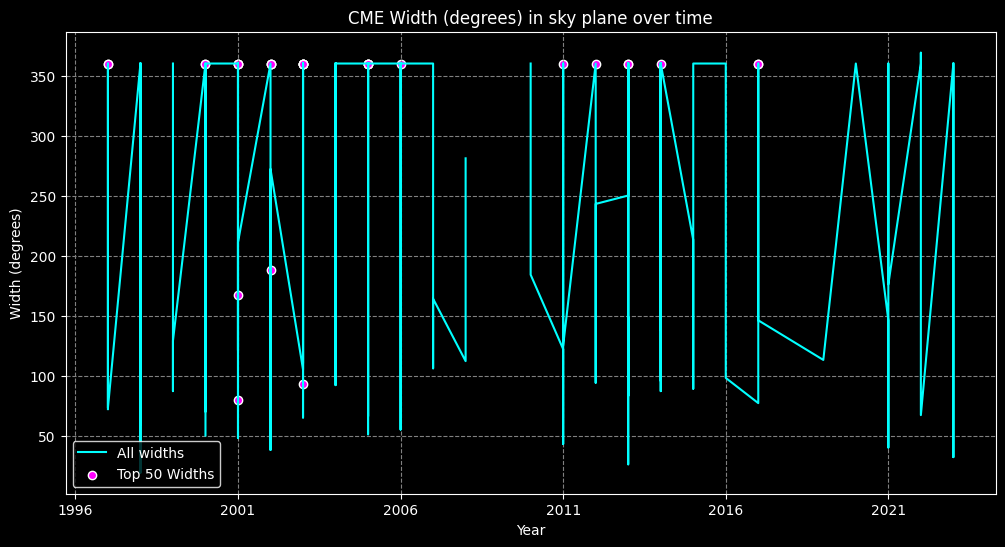

In [64]:
# Ensure 'start_date_time' is a datetime object for both df and final_result
df['start_date_time'] = pd.to_datetime(df['start_date_time'])
final_result['start_date_time'] = pd.to_datetime(final_result['start_date_time'])

# Sort the DataFrame by 'start_date_time'
df = df.sort_values('start_date_time')

# Extract the year from 'start_date_time' for both DataFrames
df['year'] = df['start_date_time'].dt.year
final_result['year'] = final_result['start_date_time'].dt.year

# Applying the dark background
plt.style.use('dark_background')

# Plotting the line chart for all frequencies in df
plt.figure(figsize=(12, 6))

# Blue line for all CME widths
plt.plot(df['year'], df['cme_width'], label='All widths', color='cyan')

# Red scatter plot for the top 50 CME widths
plt.scatter(final_result['year'], final_result['cme_width'], color='magenta', label='Top 50 Widths', edgecolor='white')

# Setting x-ticks, title, labels, and grid
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1, 5), color='white')  # Make ticks white
plt.title('CME Width (degrees) in sky plane over time', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Width (degrees)', color='white')

# Set grid style
plt.grid(True, color='gray', linestyle='--')

# Customizing the legend and setting it to the lower left
plt.legend(loc='lower left', facecolor='black', edgecolor='white', framealpha=0.8)

# Display the plot
plt.show()


##### Inferences:

-   The plot aims to display the variation of CME widths over time.
-   The plot shows a cyan line representing all CME widhts over time and magenta scatter points, which are also highlighted representing the Top 50 widhts.
-   The CME widths clearly show variations over time, with a lot of instances approaching the upper limit [which is 360 degrees].
-   The Top-50 flares, which are highlighted have higher widths which could mean significant flares have broader CME widths.
-   This pattern suggests a clear dependence on width in higher solar flares.

### Plot 2: Proportion of Halo CMEs in Full Dataset vs Top 50 flares

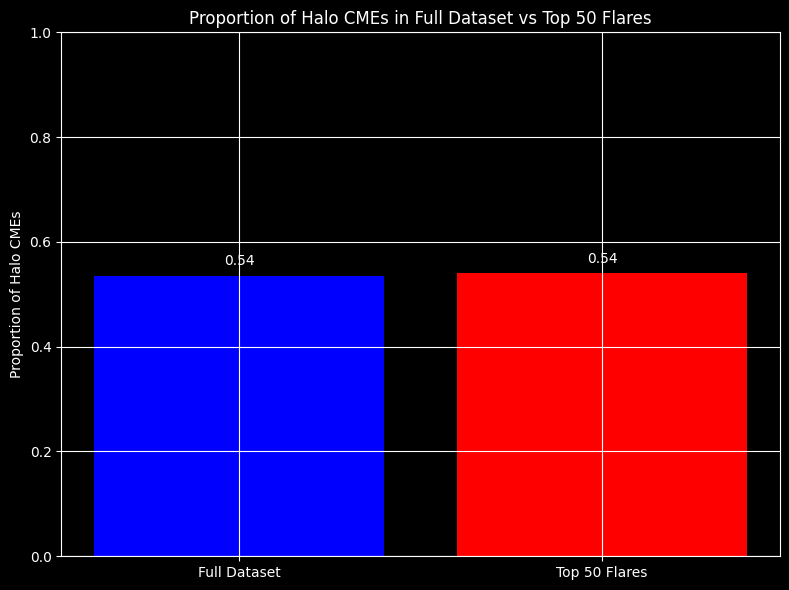

In [70]:
# Calculate the proportions
total_halo_flares = df['is_halo_flare'].sum()  # Total Halo flares (True count)
total_flares = len(df)  # Total flares
proportion_halo_full = total_halo_flares / total_flares  # Proportion in full dataset

top50_halo_flares = final_result['is_halo_flare'].sum()  # Halo flares in top 50
top_flares = len(final_result)  # Total top 50 flares (should be 50)
proportion_halo_top = top50_halo_flares / top_flares  # Proportion in top 50 dataset

# Bar plot to compare
labels = ['Full Dataset', 'Top 50 Flares']
proportions = [proportion_halo_full, proportion_halo_top]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, proportions, color=['blue', 'red'])

# Adding titles and labels
plt.title('Proportion of Halo CMEs in Full Dataset vs Top 50 Flares')
plt.ylabel('Proportion of Halo CMEs')
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1 (proportion)

# Display the proportion on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', color='white')

# Set dark background
plt.gca().set_facecolor('black')
plt.tick_params(axis='y')
plt.xticks()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


In [60]:
print('Number of true halo flares in NASA dataset: ', total_halo_flares)
print('Total Flares: ', total_flares)

print('Halo Flares in Top 50: ', top50_halo_flares )
print('Top Flares in 50: ', top_flares)

print(total_halo_flares/total_flares)
print(top50_halo_flares/top_flares)

Number of true halo flares in NASA dataset:  323
Total Flares:  603
Halo Flares in Top 50:  27
Top Flares in 50:  50
0.5356550580431177
0.54


##### Inferences:

-   The plot indicated that the proportion of Halo CMEs is identical between the full dataset and the top 50 flares, both at almost 54%. It could suggest that the flares in the top 50 do not have a higher or a lower tendency to be associated with Halo CMEs compared to the overall NASA dataset. 

-   There is also no significant variation in the proportion of Halo CMEs between two groups.

As we approach the end of the project, let us save the dataframes that were used in this project to a .csv file for later use.

In [71]:
df_r.to_csv('/Users/pramodk/Desktop/data-science-project-1/top-50-sf.csv')
df.to_csv('/Users/pramodk/Desktop/data-science-project-1/nasa-data.csv')
final_result.to_csv('/Users/pramodk/Desktop/data-science-project-1/nasa-top-50-df.csv')

### **Challenges Faced**

During the project, I encountered several significant challenges that required creative solutions and technical expertise to overcome. Below are some of the key challenges faced:

#### 1. **Bypassing 403 Error from SpaceWeatherLive Website**
   - The SpaceWeatherLive website returned a `403 Forbidden` error when attempting to access the Top 50 Solar Flares data using standard HTTP requests. This error typically occurs when the server blocks automated requests.
   - **Solution**: I used the `curl_cffi` library to mimic browser requests and bypass the restriction. This allowed me to successfully extract the required data by simulating real user activity.

#### 2. **Inconsistent Data in `flare_classification` Column**
   - The `flare_classification` column in the NASA dataset has a combination of strings, symbols and numbers, making it challenging to classifications. This was also an issue in generating visualizations in analysis.
   - **Solution**: I standardized the column by converting all values to a uniform string format, giving higher weightage to higher alphabets and then followed by floating point numbers.

#### 3. **Uncertainty in Data Origin**
   - There was ambiguity regarding whether the Top 50 Solar Flares data was derived from the NASA dataset or other sources. This made it difficult to validate the dataset against NASA’s comprehensive solar flare data.
   - **Solution**: I cross-referenced entries wherever possible and ensured that any comparisons and conclusions drawn were robust and transparent despite the uncertainty.

#### 4. **Missing Table Tags in NASA Dataset**
   - The NASA dataset did not include standard HTML table tags like `<table>`, complicating the data extraction process.
   - **Solution**: I employed custom parsing techniques using `BeautifulSoup` and regular expressions to manually extract and format the data from the irregular HTML structure.

---

These challenged helped me a lot in knowledge gaining and handling real world problems.
